In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [2]:
# Load the dataset
df = pd.read_csv('/content/loan_data_1000.csv')  # Replace path if needed
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,2,Not Graduate,No,3470,4188,53,360,1.0,Rural,Y
1,Female,Yes,3+,Not Graduate,Yes,7306,2477,450,360,1.0,Semiurban,N
2,Male,Yes,1,Not Graduate,Yes,7642,4749,181,360,1.0,Semiurban,N
3,Male,Yes,3+,Not Graduate,Yes,4319,3505,476,180,0.0,Urban,Y
4,Male,Yes,3+,Graduate,No,1864,3475,267,120,1.0,Rural,Y


In [4]:
# Overview
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1000 non-null   object 
 1   Married            1000 non-null   object 
 2   Dependents         1000 non-null   object 
 3   Education          1000 non-null   object 
 4   Self_Employed      1000 non-null   object 
 5   ApplicantIncome    1000 non-null   int64  
 6   CoapplicantIncome  1000 non-null   int64  
 7   LoanAmount         1000 non-null   int64  
 8   Loan_Amount_Term   1000 non-null   int64  
 9   Credit_History     1000 non-null   float64
 10  Property_Area      1000 non-null   object 
 11  Loan_Status        1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB
None
       ApplicantIncome  CoapplicantIncome   LoanAmount  Loan_Amount_Term  \
count      1000.000000        1000.000000  1000.000000       1000.000000   
me

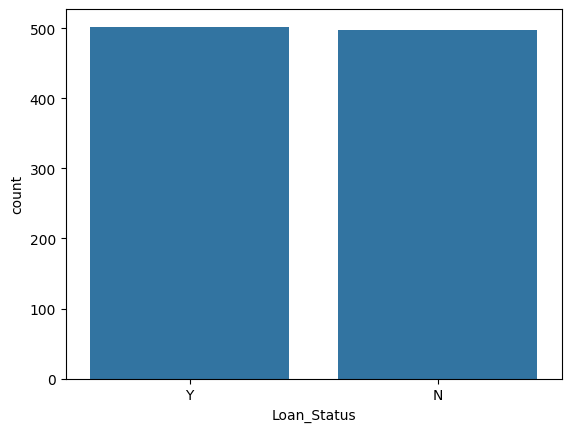

In [5]:
# Visualizations
sns.countplot(x='Loan_Status', data=df)
plt.show()



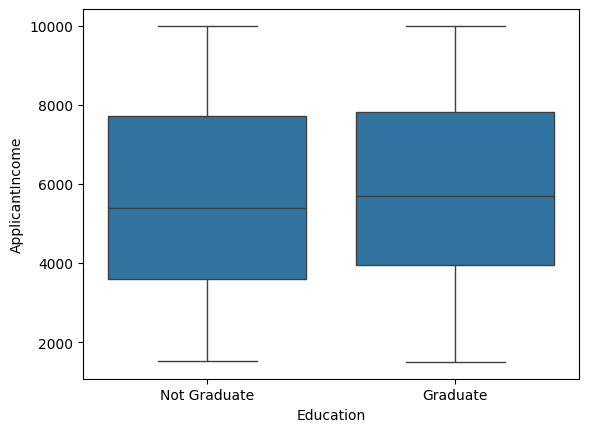

In [6]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.show()



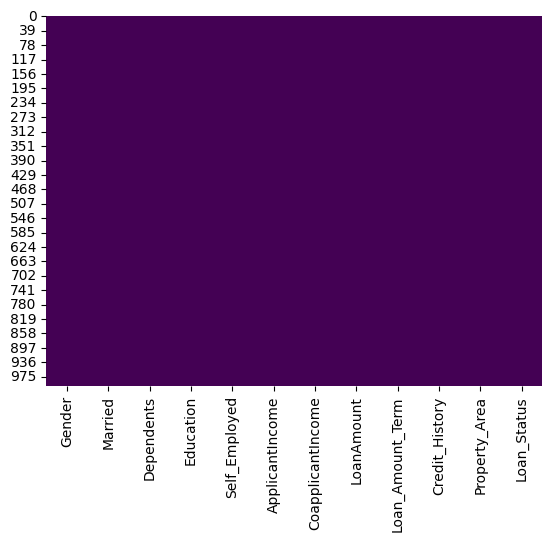

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
# Fill missing values if any
df.fillna(method='ffill', inplace=True)




/tmp/ipython-input-8-3015653278.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])


In [10]:

# Feature & Target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']



In [11]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [12]:
# Save the scaler for Flask later
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(model, 'loan_model.pkl')


Accuracy: 0.505

Confusion Matrix:
 [[52 49]
 [50 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       101
           1       0.50      0.49      0.50        99

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



['loan_model.pkl']

In [15]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [16]:
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('loan_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Loan Eligibility Predictor (English / Spanish)")

language = st.selectbox("Select Language / Seleccionar idioma", ["English", "Español (Spanish)"])

gender = st.selectbox("Gender", ["Male", "Female"])
married = st.selectbox("Married", ["Yes", "No"])
dependents = st.selectbox("Dependents", ["0", "1", "2", "3+"])
education = st.selectbox("Education", ["Graduate", "Not Graduate"])
self_employed = st.selectbox("Self Employed", ["Yes", "No"])
applicant_income = st.number_input("Applicant Income", min_value=0)
coapplicant_income = st.number_input("Coapplicant Income", min_value=0)
loan_amount = st.number_input("Loan Amount", min_value=0)
loan_amount_term = st.selectbox("Loan Term (Months)", [360, 180, 120, 84])
credit_history = st.selectbox("Credit History", [1.0, 0.0])
property_area = st.selectbox("Property Area", ["Urban", "Rural", "Semiurban"])

# Encoding manually (same as LabelEncoder did in training)
gender = 1 if gender == "Male" else 0
married = 1 if married == "Yes" else 0
dependents_map = {"0": 0, "1": 1, "2": 2, "3+": 3}
dependents = dependents_map[dependents]
education = 1 if education == "Graduate" else 0
self_employed = 1 if self_employed == "Yes" else 0
property_area_map = {"Urban": 2, "Semiurban": 1, "Rural": 0}
property_area = property_area_map[property_area]

input_data = np.array([
    gender, married, dependents, education, self_employed,
    applicant_income, coapplicant_income, loan_amount,
    loan_amount_term, credit_history, property_area
]).reshape(1, -1)

input_data = scaler.transform(input_data)

if st.button("Predict"):
    prediction = model.predict(input_data)
    if language == "Español (Spanish)":
        result = "Aprobado para el préstamo" if prediction[0] == 1 else "Rechazado para el préstamo"
    else:
        result = "Loan Approved" if prediction[0] == 1 else "Loan Rejected"

    st.success(result)


2025-07-15 19:16:20.553 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.864 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-15 19:16:20.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-15 19:16:20.875 Thread 'MainThread': mi